## CESM-LE CHL BIAS CHECK: SeaWiFS

In [1]:
import xarray as xr
import numpy as np
import util

from numpy import ma
from matplotlib import ticker, cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cmocean
import util

ModuleNotFoundError: No module named 'util'

In [ ]:
ds_obs = xr.open_zarr(f'{util.project_tmpdir}/seawifs_mapped_monthly_chl_gsm_DJF.POP_gx1v6.zarr')
#ds_obs = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/oichl-avhrr-v02r01.1990-2019_DJF.POP_gx1v6.zarr')
#rename to match simulation convention
ds_obs['Chl_surf'] = ds_obs['chl_gsm']

#select specific variables to include in sliced dataset
grid_vars = ['KMT', 'TAREA', 'TLAT', 'TLONG', 'time']
data_vars = ['Chl_surf']

ds_obs = ds_obs[data_vars+grid_vars].isel(nlat=slice(0, 93))
ds_obs

In [2]:
chl_obs_mean = ds_obs.Chl_surf.mean('time')
chl_obs_mean.plot()

NameError: name 'ds_obs' is not defined

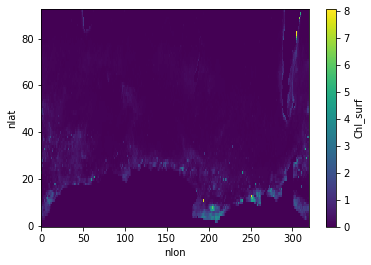

In [4]:
chl_obs_std = ds_obs.Chl_surf.std('time')
chl_obs_std.plot()

In [5]:
ds_mod = xr.open_zarr('/glade/p/cgd/oce/projects/krill-cesm-le/data/cesm-le-fields-djf.zarr')
ds_mod = ds_mod.isel(time=slice(77, 90))
ds_mod

<xarray.Dataset>
Dimensions:    (length: 3, member_id: 34, nlat: 93, nlon: 320, time: 13, z_t: 60, z_t_150m: 15)
Coordinates:
    KMT        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    dz         (z_t) float32 dask.array<chunksize=(60,), meta=np.ndarray>
  * length     (length) float64 20.0 40.0 60.0
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
  * time       (time) int64 1998 1999 2000 2001 2002 ... 2007 2008 2009 2010
  * z_t        (z_t) float32 500.0 1500.0 2500.0 ... 487508.34 512502.8 537500.0
  * z_t_150m   (z_t_150m) float32 500.0 1500.0 2500.0 ... 13500.0 14500.0
Dimensions without coordinates: nlat, nlon
Data variables:
    Chl_surf   (time, member_id, nlat, nlon) float64 dask.array<chunksize=(13, 1, 93, 320), meta=np.ndarray>
    IFRAC      (time, member_id, nlat, nlon) float64 dask.array<chunksize=(13, 1, 93, 320), meta=np.ndarray>
    KGP        (time, length, member_id, nlat, nlon) float64 dask.array<chunksize=(13, 3, 1, 93, 320), meta=np.ndarray>
    SST        (time, member_id, nlat, nlon) float64 dask.array<chunksize=(13, 1, 93, 320), meta=np.ndarray>
    SST_orig   (time, member_id, nlat, nlon) float64 dask.array<chunksize=(13, 1, 93, 320), meta=np.ndarray>

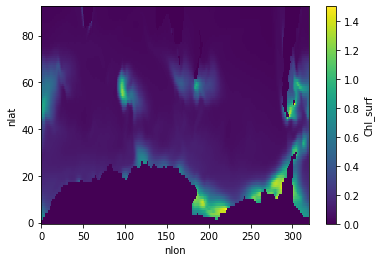

In [6]:
chl_mod_mean = ds_mod.Chl_surf.mean(dim=['member_id', 'time'])
chl_mod_mean.plot()

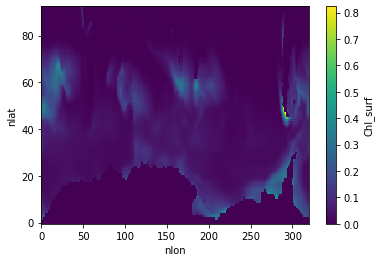

In [7]:
chl_mod_std = ds_mod.Chl_surf.std(dim=['member_id', 'time'])
chl_mod_std.plot()

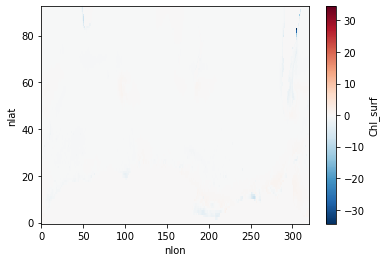

In [8]:
chl_bias = chl_mod_mean - chl_obs_mean
chl_bias.plot()

In [37]:
chl_bias

<xarray.DataArray 'Chl_surf' (nlat: 93, nlon: 320)>
dask.array<sub, shape=(93, 320), dtype=float64, chunksize=(93, 320), chunktype=numpy.ndarray>
Coordinates:
    KMT      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

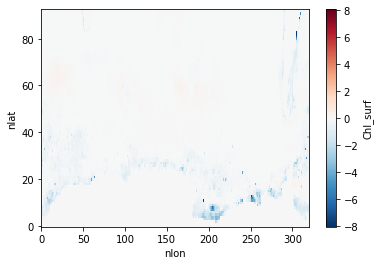

In [13]:
chl_bias_std = chl_mod_std - chl_obs_std
chl_bias_std.plot()

In [39]:
#from first notebook:
chl_mod_trans = np.exp(chl_obs_std * (np.log(ds_mod.Chl_surf) - chl_mod_mean) / chl_mod_std + chl_obs_mean)

# log transform the simulated chl data:


#chl_mod_trans = chl_obs_std * (np.log(ds_mod.Chl_surf - chl_mod_mean)) / chl_mod_std + chl_obs_mean

chl_mod_trans

<xarray.DataArray 'Chl_surf' (nlat: 93, nlon: 320, time: 13, member_id: 34)>
dask.array<exp, shape=(93, 320, 13, 34), dtype=float64, chunksize=(93, 320, 13, 1), chunktype=numpy.ndarray>
Coordinates:
    KMT        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
  * member_id  (member_id) int64 1 2 9 10 11 12 13 ... 34 35 101 102 103 104 105
  * time       (time) int64 1998 1999 2000 2001 2002 ... 2007 2008 2009 2010
Dimensions without coordinates: nlat, nlon

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


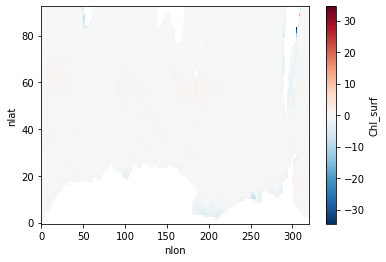

In [40]:
(chl_mod_trans.mean(dim=['member_id', 'time']) - chl_obs_mean).plot()

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


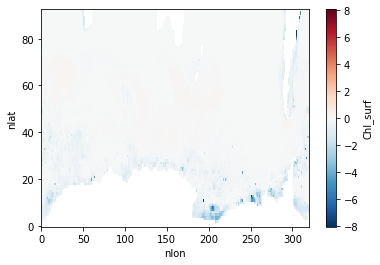

In [41]:
(chl_mod_trans.std(dim=['member_id', 'time']) - chl_obs_std).plot()

___
## Visualize Polar

In [10]:
# Plotting Standards:
class MidpointNormalize(colors.Normalize):
    """
    class to help renormalize the color scale
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [11]:
# Lat Lon Source
lon = ds_obs.TLONG.values
lat = ds_obs.TLAT.values

In [14]:
chl_biases = xr.Dataset({'mod_mean': chl_mod_mean, 'mod_std': chl_mod_std,
                        'obs_mean': chl_obs_mean, 'obs_std': chl_obs_std,
                        'mean_bias': chl_bias, 'std_bias': chl_bias_std})
chl_biases

<xarray.Dataset>
Dimensions:    (nlat: 93, nlon: 320)
Coordinates:
    KMT        (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TAREA      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    TLONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULAT       (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    ULONG      (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    mod_mean   (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    mod_std    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    obs_mean   (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    obs_std    (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    mean_bias  (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>
    std_bias   (nlat, nlon) float64 dask.array<chunksize=(93, 320), meta=np.ndarray>

In [15]:
print('mod mean: 1998-2010')
print('mean:', chl_biases.mod_mean.mean().values)
print('min:', chl_biases.mod_mean.min().values)
print('max:', chl_biases.mod_mean.max().values)
print('obs mean')
print('mean:', chl_biases.obs_mean.mean().values)
print('min:', chl_biases.obs_mean.min().values)
print('max:', chl_biases.obs_mean.max().values)
print('bias')
print('mean:', chl_biases.mean_bias.mean().values)
print('min:', chl_biases.mean_bias.min().values)
print('max:', chl_biases.mean_bias.max().values)

mod mean: 1998-2010
mean: 0.12290061749442907
min: 0.0
max: 1.5011914468660057
obs mean
mean: 0.21483348077628256
min: 0.0
max: 34.496167822309395
bias
mean: -0.09193286328185352
min: -34.456431779535215
max: 1.396757365777019


In [16]:
# Figure out Log Levels:
vector_scientific_notation = np.logspace(-3,1.55,25)
# Display vector values as floats
['{:f}'.format(x) for x in vector_scientific_notation]

['0.001000',
 '0.001547',
 '0.002394',
 '0.003705',
 '0.005732',
 '0.008870',
 '0.013725',
 '0.021237',
 '0.032860',
 '0.050845',
 '0.078674',
 '0.121735',
 '0.188365',
 '0.291463',
 '0.450990',
 '0.697831',
 '1.079775',
 '1.670770',
 '2.585235',
 '4.000215',
 '6.189658',
 '9.577452',
 '14.819493',
 '22.930666',
 '35.481339']

In [17]:
tick_labels = ['0.001', '0.009', '0.12', '4.00', '35.5']

In [18]:
tick_vector = [1.00000000e-03, 8.86985799e-03, 1.21735338e-01, 4.00021499e+00, 3.54813389e+01]

In [19]:
vector_scientific_notation

array([1.00000000e-03, 1.54733138e-03, 2.39423440e-03, 3.70467402e-03,
       5.73235837e-03, 8.86985799e-03, 1.37246096e-02, 2.12365191e-02,
       3.28599325e-02, 5.08452047e-02, 7.86743808e-02, 1.21735338e-01,
       1.88364909e-01, 2.91462935e-01, 4.50989745e-01, 6.97830585e-01,
       1.07977516e+00, 1.67076999e+00, 2.58523484e+00, 4.00021499e+00,
       6.18965819e+00, 9.57745235e+00, 1.48194926e+01, 2.29306659e+01,
       3.54813389e+01])

## Plot Observations:

In [20]:
# What are you plotting?
to_plot = chl_biases
array = to_plot.obs_mean

bounds = np.array([-0.25, -0.125, 0, 0.5, 1])
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=4)

# Make it Plottable
dsp = util.pop_add_cyclic(
    xr.Dataset({
        'feild': array,
        'TLAT': to_plot.TLAT.compute(),
        'TLONG': to_plot.TLONG.compute()} ))

In [21]:
#####################################  levels  -  norms  ######################################    
cmap_field = cmocean.cm.dense
levels = np.logspace(-3, 1.55, 25)
norm = colors.LogNorm(vmin=0.001, vmax=35.)

#####################################   extent  -  projection  ######################################    
extent = ([-180, 180, -90, -50], ccrs.PlateCarree()) #[120, 260, 10, 65]
prj = ccrs.SouthPolarStereo()
###############################  Plotting Function:  'One Plot'  ###################################
def one_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels,
                     norm=norm,
                     cmap = cmap_field,
                     #extend='both',
                     transform=ccrs.PlateCarree())
    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k',
                    levels=levels,
                    linewidths=0.25,
                    transform=ccrs.PlateCarree())

    if lines: 
        # add contour labels
        lb = plt.clabel(cs, fontsize=6, inline=True, fmt='%r')
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    return cf

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: Log scale: values of z <= 0 have been masked
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


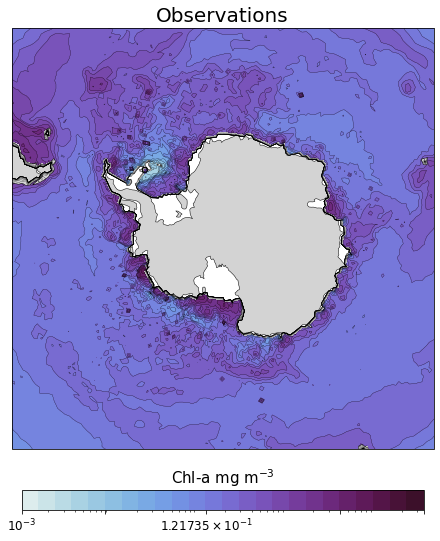

In [53]:
fig = plt.figure(figsize=(12, 10))

axs = []

# plot total
ax = fig.add_subplot(1, 1, 1, projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = one_plot(dsp.feild, lines=False)
#ax.set_title('CESM-LE mean', fontsize=20)
ax.set_title('Observations', fontsize=20)

axs.append(ax)

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.6, orientation='horizontal', pad=0.075, ax=axs, ticks=tick_vector)
cb.ax.tick_params(labelsize=12)
cb.ax.set_yticklabels(['0.001', '0.009', '0.12', '4.00', '35.5'])  # vertically oriented colorbar
cb.ax.set_title('Chl-a mg m$^{-3}$', fontsize=15);


In [54]:
for t in cb.ax.get_xticklabels():
    print(t.get_position(), t.get_text(), t.get_visible())

(0.001, 0) $\mathdefault{10^{-3}}$ True
(0.008869857990034513, 0)  True
(0.1217353380402249, 0) $\mathdefault{1.21735\times10^{-1}}$ True
(4.000214990681362, 0)  True
(35.48133890443077, 0)  True


## Plot CESM-LE Mean:

In [55]:
# What are you plotting?
to_plot = chl_biases
array = to_plot.mod_mean

# Make it Plottable
dsp = util.pop_add_cyclic(
    xr.Dataset({
        'feild': array,
        'TLAT': to_plot.TLAT.compute(),
        'TLONG': to_plot.TLONG.compute()
    } ))

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: Log scale: values of z <= 0 have been masked
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


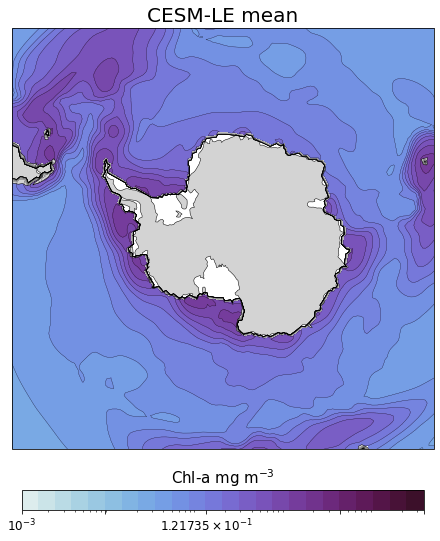

In [56]:
fig = plt.figure(figsize=(12, 10))

axs = []

# plot total
ax = fig.add_subplot(1, 1, 1, projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = one_plot(dsp.feild, lines=False)
ax.set_title('CESM-LE mean', fontsize=20)
#ax.set_title('Observations')

axs.append(ax)

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.6, orientation='horizontal', pad=0.075, ax=axs, ticks=tick_vector)
cb.ax.tick_params(labelsize=12)
cb.ax.set_yticklabels(['0.001', '0.009', '0.12', '4.00', '35.5'])  # vertically oriented colorbar
cb.ax.set_title('Chl-a mg m$^{-3}$', fontsize=15);

In [57]:
for t in cb.ax.get_xticklabels():
    print(t.get_position(), t.get_text(), t.get_visible())

(0.001, 0) $\mathdefault{10^{-3}}$ True
(0.008869857990034513, 0)  True
(0.1217353380402249, 0) $\mathdefault{1.21735\times10^{-1}}$ True
(4.000214990681362, 0)  True
(35.48133890443077, 0)  True


## Plot CESM-LE Bias:

In [58]:
print('bias')
print('mean:', chl_biases.mean_bias.mean().values)
print('min:', chl_biases.mean_bias.min().values)
print('max:', chl_biases.mean_bias.max().values)

bias
mean: -0.09193286328185352
min: -34.456431779535215
max: 1.396757365777019


In [59]:
np.linspace(-34, 2, 37)
# Figure out Log Levels:
#vector_scientific_notation = np.logspace(-3,1.55,20)
# Display vector values as floats
#['{:f}'.format(x) for x in vector_scientific_notation]

array([-34., -33., -32., -31., -30., -29., -28., -27., -26., -25., -24.,
       -23., -22., -21., -20., -19., -18., -17., -16., -15., -14., -13.,
       -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,
        -1.,   0.,   1.,   2.])

In [50]:
# What are you plotting?
to_plot = chl_biases
array = to_plot.mean_bias

# Make it Plottable
dsp = util.pop_add_cyclic(
    xr.Dataset({
        'feild': array,
        'TLAT': to_plot.TLAT.compute(),
        'TLONG': to_plot.TLONG.compute()
    } ))

In [44]:
#####################################  levels  -  norms  ######################################    
# Custom Levels 
cmap_bias = cmocean.cm.balance
levels_bias = np.linspace(-6, 2, 25)
#levels_bias = np.linspace(-4, 2, 25)

norm = colors.SymLogNorm(linthresh=0.01, linscale=0.01, vmin=-10.0, vmax=10.0, base=10),
#norm = MidpointNormalize(midpoint=0.)
locator = locator=ticker.LogLocator()#matplotlib.ticker.SymmetricalLogLocator()


#####################################   extent  -  projection  ######################################    
extent = ([-180, 180, -90, -50], ccrs.PlateCarree()) #[120, 260, 10, 65]
prj = ccrs.SouthPolarStereo()
###############################  Plotting Function:  'One Plot'  ###################################
def one_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels_bias,
                     norm=norm,
                    locator = locator,
                     cmap = cmap_bias,
                     #extend='both',
                     transform=ccrs.PlateCarree())
    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k',
                    levels=levels_bias,
                    linewidths=0.2,
                    transform=ccrs.PlateCarree())
    if lines: 
        # add contour labels
        lb = plt.clabel(cs, fontsize=6, inline=True, fmt='%r')  
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    return cf

/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: Log scale: values of z <= 0 have been masked
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/matplotlib/contour.py:1208: RuntimeWarning: invalid value encountered in sqrt
  self.layers = (np.sqrt(self._levels[:-1])
/glade/work/zephyrs/miniconda3/envs/krill-2/lib/python3.7/site-packages/matplotlib/contour.py:1209: RuntimeWarning: invalid value encountered in sqrt
  * np.sqrt(self._levels[1:]))


AttributeError: 'tuple' object has no attribute 'autoscale_None'

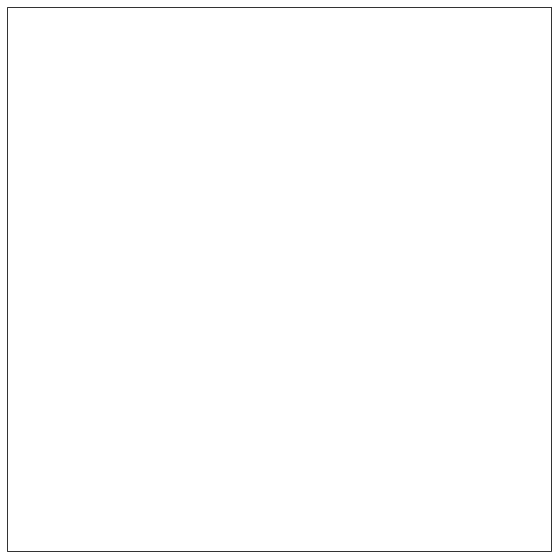

In [45]:
fig = plt.figure(figsize=(12, 10))
axs = []
# plot total
ax = fig.add_subplot(1, 1, 1, projection=prj)
ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
cf = one_plot(dsp.feild, lines=False)
ax.set_title('CESM-LE Bias', fontsize=20)
axs.append(ax)

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.5, orientation='horizontal', pad=0.075, ax=axs)
cb.ax.tick_params(labelsize=12)
cb.ax.set_title('$\Delta$ Chl-a mg m$^{-3}$', fontsize=15);

____

# Boundary Norm

In [ ]:
# What are you plotting?
to_plot = chl_biases
array = to_plot.mean_bias

# Make it Plottable
dsp = util.pop_add_cyclic(
    xr.Dataset({
        'feild': array,
        'TLAT': to_plot.TLAT.compute(),
        'TLONG': to_plot.TLONG.compute()
    } ))

In [57]:
array = dsp.feild
array

<xarray.DataArray 'feild' (nlat: 93, nlon: 321)>
dask.array<concatenate, shape=(93, 321), dtype=float64, chunksize=(93, 161), chunktype=numpy.ndarray>
Dimensions without coordinates: nlat, nlon

In [ ]:
#####################################  levels  -  norms  ######################################    
cmap_bias = cmocean.cm.balance
norm = colors.SymLogNorm(linthresh=0.01, linscale=0.01, vmin=-10.0, vmax=10.0, base=10),
#####################################   extent  -  projection  ######################################    
extent = ([-180, 180, -90, -50], ccrs.PlateCarree()) #[120, 260, 10, 65]
prj = ccrs.SouthPolarStereo()
###############################  Plotting Function:  'One Plot'  ###################################
def one_plot(da, lines=True):
    # filled contours
    cf = ax.contourf(dsp.TLONG, dsp.TLAT, da,
                     levels=levels_bias,
                     norm=norm,
                    locator = locator,
                     cmap = cmap_bias,
                     #extend='both',
                     transform=ccrs.PlateCarree())
    # contour lines
    cs = ax.contour(dsp.TLONG, dsp.TLAT, da,
                    colors='k',
                    levels=levels_bias,
                    linewidths=0.2,
                    transform=ccrs.PlateCarree())
    if lines: 
        # add contour labels
        lb = plt.clabel(cs, fontsize=6, inline=True, fmt='%r')  
    # land
    land = ax.add_feature(
        cartopy.feature.NaturalEarthFeature('physical', 'land', '110m',
                                            facecolor='lightgray'))
    ax.coastlines(linewidth=0.5)
    return cf

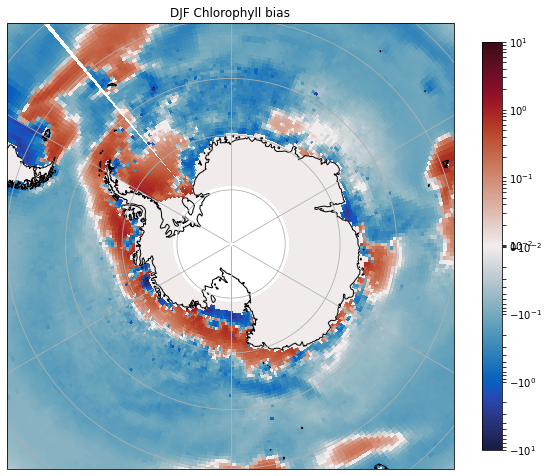

In [61]:
lon, lat = ds_mod.TLONG, ds_mod.TLAT

field = chl_mod_mean - chl_obs_mean

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent([180, -180, -90,  -50], crs=ccrs.PlateCarree())

cmap = cmocean.cm.balance

cf = ax.pcolormesh(lon, lat, field,
                 cmap=cmap,
                 norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
                               vmin=-10.0, vmax=10.0, base=10),
                 transform=ccrs.PlateCarree())

ax.coastlines('50m')
ax.gridlines()
plt.colorbar(cf, shrink=0.75);
ax.set_title('DJF Chlorophyll bias');